In [1]:
from google.colab import files
uploaded = files.upload()


Saving cifar-100-python.tar.gz to cifar-100-python.tar.gz


In [1]:
import os
print(os.listdir("cifar100"))


['cifar-100-python']


In [2]:
import tarfile

file = "cifar-100-python.tar.gz"

with tarfile.open(file, 'r:gz') as tar:
    tar.extractall("cifar100")


/tmp/ipython-input-3184243453.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall("cifar100")


In [3]:
import pickle

def load_batch(path):
    with open(path, "rb") as f:
        data_dict = pickle.load(f, encoding="latin1")
    return data_dict

train_data = load_batch("cifar100/cifar-100-python/train")
test_data  = load_batch("cifar100/cifar-100-python/test")



In [4]:
import numpy as np

X_train = train_data["data"]
y_train = train_data["fine_labels"]

X_test = test_data["data"]
y_test = test_data["fine_labels"]


In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

num_classes = 100

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.utils import to_categorical

num_classes = 100

# Convert 3072 → 32x32x3
X_train = X_train.reshape(-1, 32, 32, 3).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 32, 32, 3).astype("float32") / 255.0


In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 156ms/step - accuracy: 0.0493 - loss: 4.3100 - val_accuracy: 0.1691 - val_loss: 3.5214
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 152ms/step - accuracy: 0.1684 - loss: 3.5148 - val_accuracy: 0.2326 - val_loss: 3.2187
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.2224 - loss: 3.2204 - val_accuracy: 0.2673 - val_loss: 3.0213
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 150ms/step - accuracy: 0.2621 - loss: 3.0037 - val_accuracy: 0.2794 - val_loss: 2.9412
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 157ms/step - accuracy: 0.2940 - loss: 2.8340 - val_accuracy: 0.3109 - val_loss: 2.7970
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.3136 - loss: 2.7151 - val_accuracy: 0.3178 - val_loss: 2.7387
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 155ms/step - accuracy: 0.3352 - loss: 2.5926 - val_accuracy: 0.3176 - val_loss: 2.7833
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.3597 -

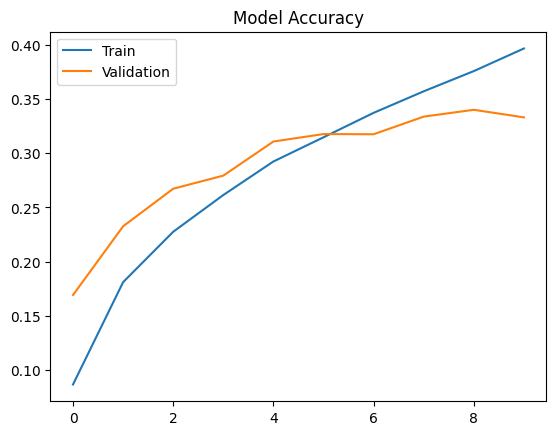

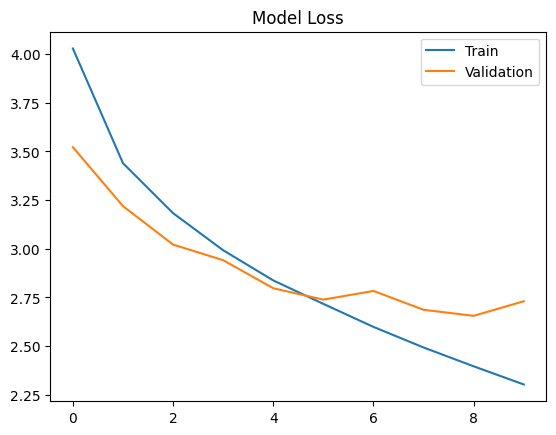

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(['Train','Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['Train','Validation'])
plt.show()


In [10]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.3393 - loss: 2.7254
Test Accuracy: 0.33320000767707825


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


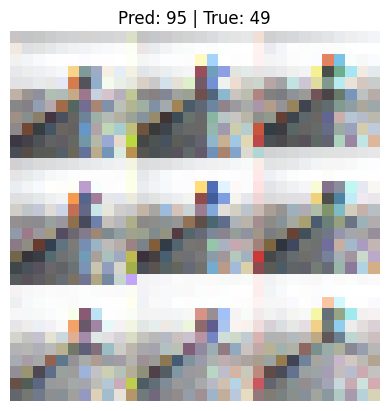

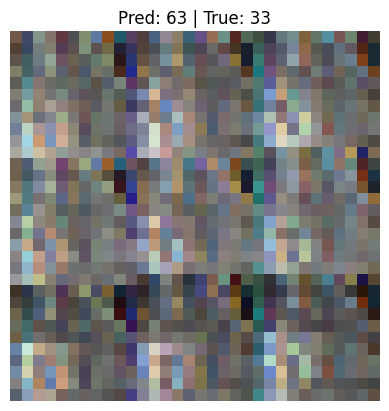

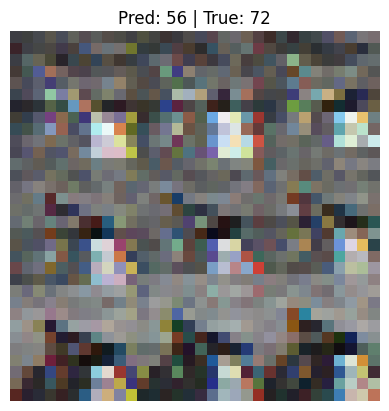

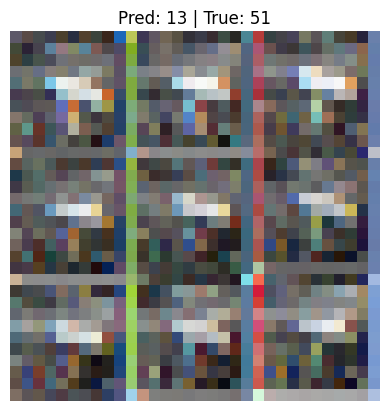

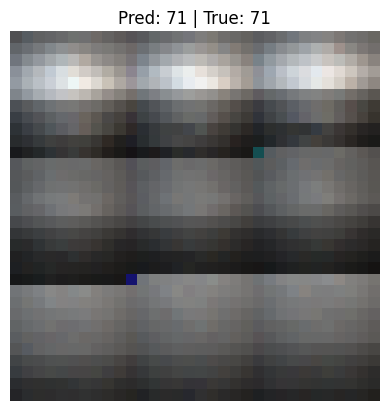

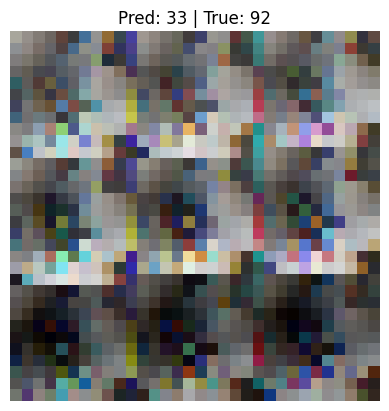

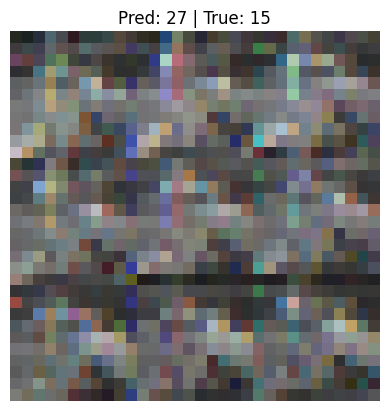

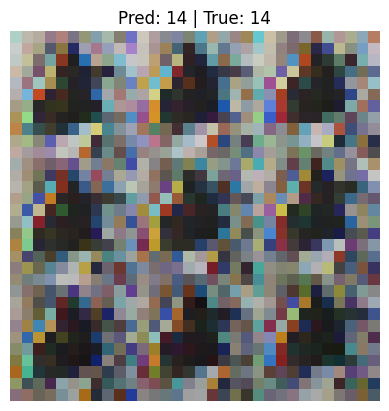

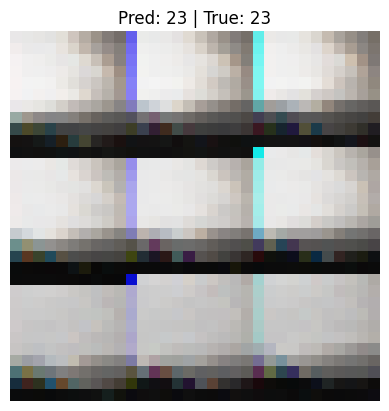

In [11]:
import numpy as np
import matplotlib.pyplot as plt

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

for i in range(9):
    plt.imshow(X_test[i])
    plt.title(f"Pred: {pred_classes[i]} | True: {true_classes[i]}")
    plt.axis('off')
    plt.show()
